<a href="https://colab.research.google.com/github/stinh/Tiba_03_Image-recognition/blob/main/00_practice_20211022_Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

影像二值化：整個圖片一個門檻值



120.0
127.0


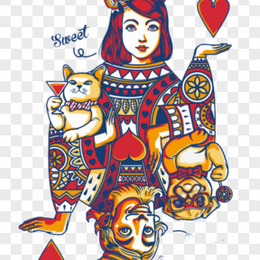

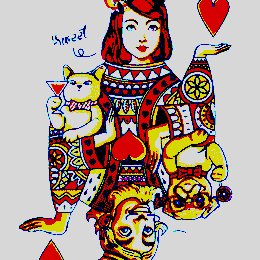

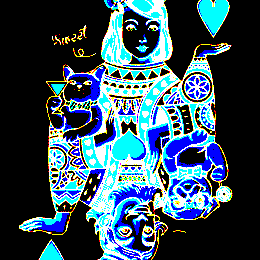

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

#th, m2=cv2.threshold(m1, 127, 255, cv2.THRESH_BINARY)  # th 是指門檻變數 #此例門檻變數設為127，最大值設為255
th, m2=cv2.threshold(m1, 120, 215, cv2.THRESH_BINARY)  #二分法後，小於切點(120)視為0，大於切點視為215
threshold, m3=cv2.threshold(m1, 127, 255, cv2.THRESH_BINARY_INV) #二分法後，顛倒，小於切點(127)視為255，大於切點視為0

print(th) 
print(threshold)
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

# th, m4[:,:,0]=cv2.threshold(m1[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# print(th)
# th, m4[:,:,1]=cv2.threshold(m1[:,:,1], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# print(th)
# th, m4[:,:,2]=cv2.threshold(m1[:,:,2], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# print(th)
# cv2_imshow(m4)

# print(m4)

影像二值化：圖片切區塊，個別調整，參考資料：https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

m2=m1.copy() #此法要先產製m2，並個別針對BGR做設定

m2[:,:,0]=cv2.adaptiveThreshold(
  m1[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY,13,-2  #區塊大小限用奇數
)

m2[:,:,1]=cv2.adaptiveThreshold(
  m1[:,:,1],215,cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY,15,0
)

m2[:,:,2]=cv2.adaptiveThreshold(
  m1[:,:,2],230,cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY,9,2
)

cv2_imshow(m1)
cv2_imshow(m2)


m3=m1.copy() #此法要先產製結果圖像m2，並個別針對BGR做設定

m3[:,:,0]=cv2.adaptiveThreshold(  m1[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,  cv2.THRESH_BINARY_INV,13,-2)

m3[:,:,1]=cv2.adaptiveThreshold(  m1[:,:,1],215,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  cv2.THRESH_BINARY,15,0)

m3[:,:,2]=cv2.adaptiveThreshold(  m1[:,:,2],230,cv2.ADAPTIVE_THRESH_MEAN_C,  cv2.THRESH_BINARY,9,2)

cv2_imshow(m3)

影像邊緣偵測、影像模糊化

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

# ================================ 影像邊緣偵測 ================================

#先用大的門檻值檢測邊緣，再用小的門檻值將檢測出來的結果線條連起來

m2=cv2.Canny(m1,100,200) #(圖像變數,門檻值1,門檻值2)


# ================================ 影像模糊化：平均值 ================================

#結果圖像=cv2.blur(圖像變數,(寬, 高)) ，(寬，高)數值越大越模糊

# m3=cv2.blur(m1,(15,15)) #<<兩個數值設一樣，像是看不清楚的糊

m3=cv2.blur(m1,(1,50)) #<<<兩個數值設不一樣，會有上下晃動感，很糊

# ================================ 影像模糊化：中值 ================================

#結果圖像=cv2.medianBlur(圖像變數,處理數量)，處理數量必須為奇數(才有中位數)，數值越大越糊

m4=cv2.medianBlur(m1,15)

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)



影像銳利化

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

m2=m1.copy() #涉及分析GBR都要先產製結果圖像

# 直方圖均衡化法：結果圖像=cv2.equalizeHist(圖像變數)，只接受單一通道色彩空間，所以要個別針對BGR設定


m2[:,:,0]=cv2.equalizeHist(m1[:,:,0])
m2[:,:,1]=cv2.equalizeHist(m1[:,:,1])
# m2[:,:,2]=cv2.equalizeHist(m1[:,:,2])

cv2_imshow(m1)
cv2_imshow(m2)


形態學：侵蝕、膨脹

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

'''

侵蝕(色彩值低的會侵蝕色彩值高的)：
結果圖像 = cv2.erode(圖像變數, np.ones((高, 寬)))

膨脹(色彩值高的會侵蝕色彩值低的) ：
結果圖像 = cv2.dilate(圖像變數, np.ones((高, 寬)))

'''

m1=cv2.imread("4.jpg",1)

# m2=cv2.erode(m1,np.ones((30,50)))
# m3=cv2.dilate(m1,np.ones((25,35)))

# cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)

# ================================ 同時執行侵蝕與膨脹 ================================

'''
cv2.morphologyEx(圖像變數, 方法, np.ones((高, 寬)))

方法：
• cv2.MORPH_OPEN：先執行侵蝕後執行膨脹
• cv2.MORPH_CLOSE：先執行膨脹後執行侵蝕
• cv2.MORPH_GRADIENT：執行膨脹與侵蝕產生的變化差

'''

m4=cv2.erode(m1,np.ones((2,1))) #先侵蝕
m4=cv2.dilate(m4,np.ones((2,1))) #再針對侵蝕後膨脹

m5=cv2.morphologyEx(m1, cv2.MORPH_OPEN, np.ones((2,1)))

#m4、m5效果一樣
#用相同條件同時侵蝕、膨脹，看起來和原圖一樣，但實際邊緣有差異

m6=cv2.morphologyEx(m1, cv2.MORPH_GRADIENT, np.ones((2,1))) #看變化差

cv2_imshow(m1)
cv2_imshow(m4)
cv2_imshow(m5)
cv2_imshow(m6)

**色彩篩選**：判斷圖像裡的各項素是否在指定色彩範圍內，把背景、前景區隔(產出結果一律為黑白)


In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("4.jpg",1)

'''
結果圖像=cv2.inRange(圖像變數, 顏色下限(B,G,R), 顏色上限(B,G,R))

把背景、前景區隔(產出結果一律為黑白)，會變黑白照片(2維度)，傳回一張與傳入變數相同大小的黑白圖像，在範圍內的像素會被設白色，否為則黑色

'''

m2=cv2.inRange(m1, (0,0,0), (50,50,50))
m3=cv2.inRange(m1, (200,200,200), (255,255,255))

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)






In [ ]:

# ================================ 應用：去雜訊(適用白底背景去雜訊) ================================

m1=cv2.imread("5.png",1)

m2=cv2.inRange(m1, (200,200,200), (255,255,255)) #先用色彩篩選，把背景、前景區隔(產出結果一律為黑白)，背景變白(255)、主體變黑(0)
m2=cv2.cvtColor(m2,cv2.COLOR_GRAY2BGR) #將圖片轉為三維度
m3=cv2.add(m1,m2) 

'''
圖片加成後：
利用色彩篩選後的顏色數值取代
所以原圖的背景會被新圖255蓋過
新圖的主體黑色(0)會被原圖主體的數值蓋過
所以可以達到去背的效果
'''
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

In [ ]:
# ================================ 應用：去雜訊(適用白底背景去複雜雜訊) ================================

from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

'''
利用色彩篩選 顏色上限 、顏色下限
分別取出 m2：星星黑框。m3:星星黃圖
利用bitwise_and：把兩張圖片加和，任一張有黑色的位置就以黑色呈現
bitwise_and是對影象每個畫素值進行二進位制操作，1&1=1，1&0=0，0&1=0，0&0=0，0：黑，1：白
最後和原圖疊合
'''

m1=cv2.imread("6.png",1) #白底上有多個雜訊，但和主體色沒有重疊

#色彩篩選，以黑白區隔背景和前景，要取黑框，範圍條件設定接近黑色，先把黑色轉白色，其他轉黑色
m2=cv2.inRange(m1, (0,0,0), (50,50,50))
m2=cv2.bitwise_not(m2) #色階相反(黑變白、白變黑)

#色彩篩選，以黑白區隔背景和前景，要取黃底星，範圍條件設定接近黃色，先把黃色轉白色，其他轉黑色
m3=cv2.inRange(m1, (30,200,200), (80,255,255))
m3=cv2.bitwise_not(m3)

m4=cv2.bitwise_and(m2,m3) #把兩張圖片黑色的地方疊合
m4=cv2.erode(m4,np.ones((2,2))) #因為有毛邊沒處理好，所以用侵蝕處理 

m4=cv2.cvtColor(m4,cv2.COLOR_GRAY2BGR) #做和原圖加和前要先轉回三維
m5=cv2.add(m1,m4)

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)
cv2_imshow(m5)

**取得輪廓**

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

'''
輪廓點, 輪廓階層資料 = cv2.findContours(圖像變數(灰階圖像),類型,方法)

類型：
• cv2.RETR_EXTERNAL：只儲存最外層的輪廓
• cv2.RETR_LIST：儲存所有輪廓，但不建立階層資料
• cv2.RETR_CCOMP：儲存所有輪廓，但階層資料只包留兩層，首階層為物件外圍，第二階層為內部空心部分的輪廓，如果更內部有其餘物件，包含於首階層
• cv2.RETR_TREE：儲存所有輪廓與其對應的階層資料

方法：
• cv2.CHAIN_APPROX_NONE：儲存所有輪廓點
• cv2.CHAIN_APPROX_SIMPLE：簡化輪廓點，一條線只儲存頭尾

'''

m1=cv2.imread("3.png",1)
m2=cv2.inRange(m1, (200,200,200), (255,255,255))
a, b = cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(m1,a,-1,(0,0,255),2)
# cv2.drawContours(m1,a,1,(0,0,255),2)

cv2_imshow(m1)
# cv2_imshow(m2)


**`取得輪廓，依指定條件取得圖像`**

輪廓數量： 5


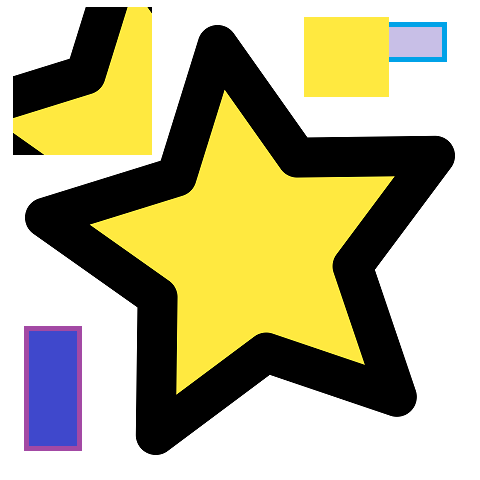

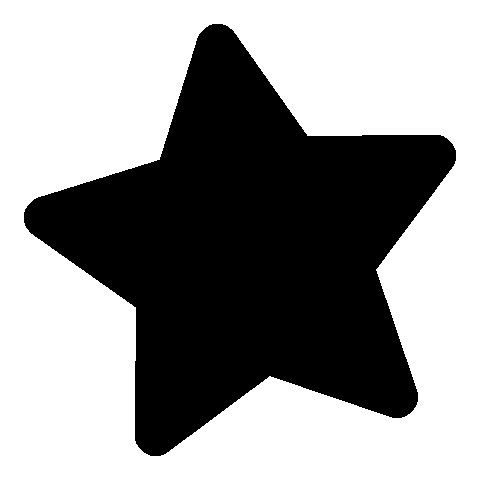

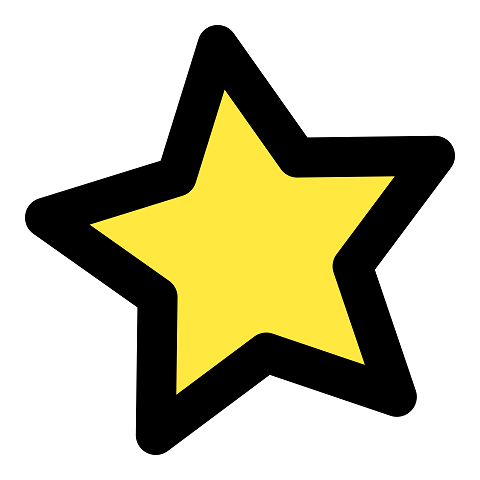

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("7.png",1) #雜訊複雜，且有和主體相同的顏色

m2=cv2.inRange(m1, (200,200,200), (255,255,255)) #先做黑白照(色彩篩選)

a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #取得輪廓，a是輪廓點

print("輪廓數量：",len(a)) #看整張圖總共有幾個輪廓，底圖圖框也算在內

#此範例取輪廓面積最大的圖像
maxIndex=1 
for i in range(2,len(a),1):
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  x2, y2, w2, h2 =cv2.boundingRect(a[maxIndex])
  if w1*h1 > w2*h2:
    maxIndex = i
  
# cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)

m3=np.full(m1.shape,(255,255,255),np.uint8) #先做一張底圖
cv2.drawContours(m3,a,maxIndex,(0,0,0),-1) #在底圖上繪製輪廓
m4=cv2.add(m1,m3) #兩張圖相加

cv2_imshow(m1)
# cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)

**取得輪廓，依指定條件取圖片中的文字**

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("8.png",1)
m2=cv2.inRange(m1, (200,200,200), (255,255,255))
m2=cv2.erode(m2,np.ones((2,20)))
a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# print("輪廓數量：",len(a)) 

'''
取文字要先用侵蝕(因為是白底黑字)把文字整個變成一個圖塊 
再另用高寬比關係找到區塊，並作圖，只留下文字的區塊
另用圖片加成坐其他去背(因為白色是255最大)
'''
for i in range(0,len(a),1):
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  if w1>h1*3:
    m3=np.full(m1.shape,(255,255,255),np.uint8) #做底圖
    cv2.drawContours(m3,a,i,(0,0,0),-1) #繪製輪廓

m3=cv2.add(m1,m3)

# cv2_imshow(m1)
# cv2_imshow(m2)
cv2_imshow(m3)

error: ignored

**文字辨識**

In [ ]:
!apt install tesseract-ocr

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=e16e01aa47ded10f32665b1ccd3060b8f7c31567b8c2396b32e2ffce0dc591bd
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt

m1=cv2.imread("9.png",1)
text=pt.image_to_string(m1,"eng","") #文字辨識指令
print("辨識出來的問字：",text) #文字辨識結果
cv2_imshow(m1) #原圖影像

**文字辨識應用：先用色彩篩選等去背，留下目標圖塊後再辨識，應用實例車牌辨識、ETC**

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt

m1=cv2.imread("5.jpg",1)
m2=cv2.inRange(m1, (0,0,0), (50,50,50))
m2=cv2.dilate(m2,np.ones((3,25)))
a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("輪廓數量：",len(a))


# ================================ 利用面積篩出目標圖塊再辨識 ================================ 

maxIndex=0
for i in range(1,len(a),1):
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  x2, y2, w2, h2 =cv2.boundingRect(a[maxIndex])
  if w1*h1>w2*h2:
    maxIndex=i

m3=np.full(m1.shape,(255,255,255),np.uint8)
cv2.drawContours(m3,a,maxIndex,(0,0,0),-1)
m3=cv2.add(m1,m3)

text=pt.image_to_string(m3,"eng","")
print("辨識出來的問字：",text)
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)



# ================================ 利用圖塊中心點與圖片中心點距離出目標圖塊 ================================ 

middle=int(m1.shape[0]/2)
center=int(m1.shape[1]/2)
minIndex=0
for i in range(1,len(a),1):
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  x2, y2, w2, h2 =cv2.boundingRect(a[minIndex])
  center1=abs(int(x1+(w1/2))-center) #算距離 要用絕對值abs
  middle1=abs(int(y1+(h1/2))-middle)
  center2=abs(int(x2+(w2/2))-center)
  middle2=abs(int(y2+(h2/2))-middle)
  if center1+middle1<center2+middle2:
    minIndex=i

m3=np.full(m1.shape,(255,255,255),np.uint8)
cv2.drawContours(m3,a,minIndex,(0,0,0),-1)
# m3=cv2.add(m1,m3)

text=pt.image_to_string(m3,"eng","")
print("辨識出來的問字：",text)
# cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)


**文字辨識學習字型**

In [ ]:
!python training.py

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import pytesseract as pt

m1=cv2.imread("my1.png",1)
text=pt.image_to_string(m1,"my","")
print("辨識出來的文字：",text)
cv2_imshow(m1)


In [ ]:
!python training.py

請輸入這個新語言包的名稱：my
請輸入要學習的圖檔名稱：my.png
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
請先確認my.box檔案內容是否正確在按Enter鍵Traceback (most recent call last):
  File "training.py", line 9, in <module>
    input(f"請先確認{lang}.box檔案內容是否正確在按Enter鍵")
KeyboardInterrupt
^C


**條碼辨識、偵測**

In [ ]:
!apt install libzbar-dev

In [ ]:
!pip install pyzbar

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
from pyzbar import pyzbar

m1=cv2.imread("10.png",1)
ret=pyzbar.decode(m1)
for d in ret:
  print("條碼類型：",d.type)
  print("條碼內容：",d.data.decode("utf-8"))
  x,y,w,h=d.rect
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)
  print("=============")
cv2_imshow(m1)

**辨識：例如人臉辨識**

In [ ]:
!unzip haarcascades.zip

unzip:  cannot find or open haarcascades.zip, haarcascades.zip.zip or haarcascades.zip.ZIP.


In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("7.jpg",1)
p1=cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
ret=p1.detectMultiScale(m1,minNeighbors=1,minSize=(10,10))
for x,y,w,h in ret:
  cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)

cv2_imshow(m1)